# 2r - Event to Event

(220_HW12_P2r)

In [8]:
import ema as em
import numpy as np
# import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [9]:
mdl = em.rModel(2,3) # model in 2 dimensions with 3 dofs / node 
n = mdl.dnodes
e = mdl.delems
# pre-define element properties for convenience; these can alse be assigned indiviudally.

mdl.material('default', E=1000)
mdl.xsection('default', 1e6, 50)
xt = mdl.xsection('truss', 10, 1)

mdl.node('1', 0.0, 0.0)
mdl.node('2', 8.0, 0.0)
mdl.node('3', 8.0, 6.0)
mdl.node('4', 16., 6.0)
mdl.node('5', 16., -4.)

# elements
mdl.beam('a', n['1'], n['2'], Qpl=[1e6, 120, 120])
mdl.beam('b', n['2'], n['3'], Qpl=[1e6, 120, 120])
mdl.beam('c', n['3'], n['4'], Qpl=[1e6, 120, 120])
mdl.beam('d', n['4'], n['5'], Qpl=[1e6, 180, 180])
mdl.truss('e', n['2'], n['4'], xsec=xt, Qpl=[ 30])

# Fixities
mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['5'], ['x', 'y', 'rz'])

# Loading
n['3'].p['y'] = -30
n['3'].p['x'] =  50

mdl.DOF = mdl.numdofs()

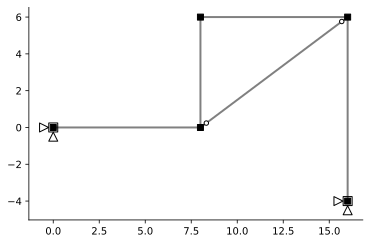

In [10]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [11]:
ee = em.Event2Event(mdl)
ee.run()
ee.lamda

array([0.        , 1.26346229, 1.42471482, 1.53116075, 1.70774411,
       1.75555556])

In [12]:
ee.Q[-1] # forces at last event

,$Q_{{}}$
$a_1$,0.000000
$a_2$,120.000000
$a_3$,-82.666667
$b_1$,0.000000
$b_2$,82.666667
$b_3$,120.000000
$c_1$,0.000000
$c_2$,-120.000000
$c_3$,-120.000000
$d_1$,0.000000


In [13]:
ee.U # displacement vectors at each event

,0,1,2,3,4,5
0,0.0,-0.016180,-0.020235,-0.026011,-0.054760,-0.068836
1,0.0,-0.004619,-0.005641,-0.006943,-0.013000,-0.016213
2,0.0,0.025365,0.030523,0.039657,0.080000,0.102720
3,0.0,-0.001066,-0.001211,0.000051,0.003645,0.005404
4,0.0,0.000290,0.000409,0.000051,-0.006000,-0.008272
